In [1]:
import pandas as pd
import numpy as np
from dataloading import DataLoader
from datapreparation_py import DataPreparation
from cv_py import CrossValidation
from visualize_py import Visualize
from eda_py import EDA
from implicit.evaluation import ranking_metrics_at_k, train_test_split
from implicit.nearest_neighbours import CosineRecommender
import matplotlib.pyplot as plt
from scipy import sparse

%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

c:\Users\781110104\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


Notebook for final model comparison:

Dataloading and preparation:

In [2]:
dl = DataLoader()
user_item_co = dl.import_data('AGCO', 'CO', 'df')
user_item_co_t = dl.import_data('TEREX', 'CO', 'df')

In [3]:
user_item_filtered = dl.remove_low_interact_items(user_item_co, 1)
user_item_filtered_t = dl.remove_low_interact_items(user_item_co_t, 1)

user_item_filtered_log = dl.log_scale_df(user_item_filtered, 0.01)
user_item_filtered_log_t = dl.log_scale_df(user_item_filtered_t, 0.01)

user_item_csr = dl.to_csr(user_item_filtered_log)
user_item_csr_t = dl.to_csr(user_item_filtered_log_t)

In [3]:
# initial split
train, test = train_test_split(user_item_csr, 0.8, 22)
train_t, test_t = train_test_split(user_item_csr_t, 0.8, 22)

In [4]:
cv = CrossValidation(5)

1a. iALS model for OEM#1 data. 
Parameters:
alpha: 0.3, lambda: 90, iterations: 25, factors: 150

In [25]:
space_iALS = {'factors' : [150], 'regularization' : [90], 'alpha' : [0.3], 'iterations' : [25]}
hyper_ials = cv.evaluate_at_k_new(space_iALS, 'iALS', train, test, 15)

1b. iALS model for OEM#2 data. 
Parameters:
alpha: 1.3, lambda: 90, iterations: 25, factors: 100

In [85]:
space_iALS_t = {'factors' : [100], 'regularization' : [90], 'alpha' : [1.3], 'iterations' : [25]}
hyper_ials_t = cv.evaluate_at_k_new(space_iALS_t, 'iALS', train_t, test_t, 15)

In [86]:
hyper_ials_t

,precision,map,ndcg,auc,mpr
1,0.625000,0.625000,0.625000,0.501359,0.105524
2,0.675000,0.625000,0.663685,0.503492,0.105524
3,0.683333,0.608333,0.672206,0.504977,0.105524
4,0.650000,0.568750,0.651660,0.506505,0.105524
5,0.630000,0.544000,0.638322,0.507786,0.105524
6,0.637500,0.539444,0.642275,0.509078,0.105524
7,0.607143,0.509830,0.622367,0.509853,0.105524
8,0.612500,0.505476,0.624572,0.511666,0.105524
9,0.605556,0.495917,0.619296,0.512707,0.105524
10,0.585000,0.479325,0.605344,0.513360,0.105524


2a. eALS model for OEM#1 data. Parameters: alpha: 0.1, lambda: 230, w0: 60000, iterations: 30, factors: 200

In [9]:
space_eALS = {'factors' : [200], 'regularization' : [230], 'alpha' : [0.1], 'w0' : [60000], 'iterations' : [30]}
hyper_eals = cv.evaluate_at_k_new(space_eALS, 'eALS', train, test, 15)

converting type of user_items to <class 'numpy.float32'>


2b. eALS model for OEM#2 data. Parameters: alpha: 0.1, lambda: 50, w0: 5000, iterations: 25, factors: 50

In [17]:
space_eALS_t = {'factors' : [50], 'regularization' : [50], 'alpha' : [0.1], 'w0' : [5000], 'iterations' : [25]}
hyper_eals_t = cv.evaluate_at_k_new(space_eALS_t, 'eALS', train_t, test_t, 15)

converting type of user_items to <class 'numpy.float32'>


3a. BPR model for OEM#1 data. Parameters: gamma: 0.005, lambda: 0.03, iterations: 30, factors: 50

In [26]:
space_BPR = {'factors' : [50], 'regularization' : [0.03], 'learning_rate' : [0.005], 'iterations' : [30]}
hyper_bpr = cv.evaluate_at_k_new(space_BPR, 'BPR', train, test, 15)

3b. BPR model for OEM#2 data. Parameters: gamma: 0.03, lambda: 0.04, iterations: 15, factors: 50

In [21]:
space_BPR_t = {'factors' : [50], 'regularization' : [0.04], 'learning_rate' : [0.03], 'iterations' : [15]}
hyper_bpr_t = cv.evaluate_at_k_new(space_BPR_t, 'BPR', train_t, test_t, 15)

4a. LMF model for OEM#1 data. Parameters: gamma: 1.2, lambda: 40, negprop: 50, iterations: 25, factors:10

In [27]:
space_LMF = {'factors' : [10], 'regularization' : [40], 'learning_rate' : [1.2], 'iterations' : [25], 'neg_prop': [50]}
hyper_lmf = cv.evaluate_at_k_new(space_LMF, 'LMF', train, test, 15)

4b. LMF model for OEM#2 data. Parameters: gamma: 1.2, lambda: 20, negprop: 0, iterations: 20, factors:50

In [11]:
space_LMF_t = {'factors' : [50], 'regularization' : [20], 'learning_rate' : [1.2], 'iterations' : [20], 'neg_prop': [0]}
hyper_lmf_t = cv.evaluate_at_k_new(space_LMF_t, 'LMF', train_t, test_t, 15)

5a. FM model for OEM#1 data. Parameters: gamma: , alpha: , loss: , ms: . Features: uf: , if: 

In [ ]:
interactions_csr = sparse.load_npz('interactions_csr.npz')
weights_csr = sparse.load_npz('weights_csr.npz')
itemf = sparse.load_npz('itemf.npz')
train_i, test_i = train_test_split(interactions_csr, 0.8, 22)
train_w, test_w = train_test_split(weights_csr, 0.8, 22)

In [ ]:
space_FM = {'factors' : [100], 'regularization' : [0.0005], 'learning_rate' : [0.05], 'iterations' : [12], 'loss': ['warp'], 'max_sampled' : [100]}
hyper_fm = cv.evaluate_at_k_new(space_FM, 'FM', train_w, test_w, 15, itemf)

5b. FM model for OEM#2 data. Parameters: gamma: , alpha: , loss: , ms: . Features: uf: , if: 

In [59]:
interactions_csr_t = sparse.load_npz('interactions_csr_t.npz')
weights_csr_t = sparse.load_npz('weights_csr_t.npz')
userf_t = sparse.load_npz('userf_t.npz')
train_i_t, test_i_t = train_test_split(interactions_csr_t, 0.8, 22)
train_w_t, test_w_t = train_test_split(weights_csr_t, 0.8, 22)

In [68]:
space_FM_t = {'factors' : [100], 'regularization' : [0.0001], 'learning_rate' : [0.001], 'iterations' : [30], 'loss': ['warp'], 'max_sampled' : [5]}
hyper_fm_t = cv.evaluate_at_k_new(space_FM_t, 'FM', train_w_t, test_w_t, 15, userf_t)

6. Baseline models: cosine-similarity neighborhood-based model for both datasets


In [12]:
model = CosineRecommender()
# fit cosine model on OEM#1 data
model.fit(train)

In [13]:
model_t = CosineRecommender()
# fit cosine model on OEM#2 data
model_t.fit(train_t)

In [30]:
# evaluate Cosine model at k for OEM1 data
for k in range(15):
    metrics = ranking_metrics_at_k(model, train, test, k+1, show_progress=False)
    metrics_df = pd.DataFrame(metrics, index=[k+1])
    if k == 0:
        ret_df = metrics_df
    else:
        ret_df = pd.concat([ret_df, metrics_df])

In [33]:
ret_df

,precision,map,ndcg,auc
1,0.828383,0.828383,0.828383,0.500425
2,0.826733,0.802805,0.826359,0.500825
3,0.817382,0.773011,0.814481,0.501226
4,0.801980,0.738586,0.792713,0.501562
5,0.796700,0.726282,0.789651,0.501926
6,0.792629,0.718298,0.787986,0.502306
7,0.776992,0.683330,0.761727,0.502608
8,0.771865,0.669653,0.760032,0.502965
9,0.768243,0.666076,0.759771,0.503304
10,0.761386,0.649333,0.749115,0.503626


In [15]:
# evaluate Cosine model at k for OEM2 data
for k in range(15):
    metrics_t = ranking_metrics_at_k(model_t, train_t, test_t, k+1, show_progress=False)
    metrics_df_t = pd.DataFrame(metrics_t, index=[k+1])
    if k == 0:
        ret_df_t = metrics_df_t
    else:
        ret_df_t = pd.concat([ret_df_t, metrics_df_t])

In [35]:
ret_df_t

,precision,map,ndcg,auc
1,0.550000,0.550000,0.550000,0.501666
2,0.525000,0.468750,0.519343,0.503311
3,0.508333,0.423611,0.501536,0.504303
4,0.462500,0.330729,0.431377,0.505039
5,0.440000,0.305167,0.421102,0.505932
6,0.429167,0.285833,0.413206,0.507374
7,0.425000,0.288852,0.416448,0.508368
8,0.400000,0.240290,0.372091,0.508869
9,0.394444,0.235708,0.375156,0.509605
10,0.390000,0.226639,0.377067,0.510466


Prepare data for visualization:

In [31]:
precision_a = pd.DataFrame({'iALS' : hyper_ials.precision, 'eALS': hyper_eals.precision, 'BPR' : hyper_bpr.precision, 'LMF' : hyper_lmf.precision, 'Cosine': ret_df.precision}, index=hyper_ials.index)
map_a = pd.DataFrame({'iALS' : hyper_ials.map, 'eALS': hyper_eals.map, 'BPR' : hyper_bpr.map, 'LMF' : hyper_lmf.map, 'Cosine': ret_df.map}, index=hyper_ials.index)
ndcg_a = pd.DataFrame({'iALS' : hyper_ials.ndcg, 'eALS': hyper_eals.ndcg, 'BPR' : hyper_bpr.ndcg, 'LMF' : hyper_lmf.ndcg, 'Cosine': ret_df.ndcg}, index=hyper_ials.index)

In [70]:
precision_t = pd.DataFrame({'iALS' : hyper_ials_t.precision, 'eALS' : hyper_eals_t.precision, 'BPR': hyper_bpr_t.precision, 'LMF': hyper_lmf_t.precision, 'FM': hyper_fm_t.precision, 'Cosine' : ret_df_t.precision}, index=hyper_ials_t.index)
map_t = pd.DataFrame({'iALS' : hyper_ials_t.map, 'eALS' : hyper_eals_t.map, 'BPR': hyper_bpr_t.map, 'LMF': hyper_lmf_t.map, 'FM': hyper_fm_t.map, 'Cosine' : ret_df_t.map}, index=hyper_ials_t.index)
ndcg_t = pd.DataFrame({'iALS' : hyper_ials_t.ndcg, 'eALS' : hyper_eals_t.ndcg, 'BPR': hyper_bpr_t.ndcg, 'LMF': hyper_lmf_t.ndcg, 'FM': hyper_fm_t.ndcg, 'Cosine' : ret_df_t.ndcg}, index=hyper_ials_t.index)

Visualizations of results:

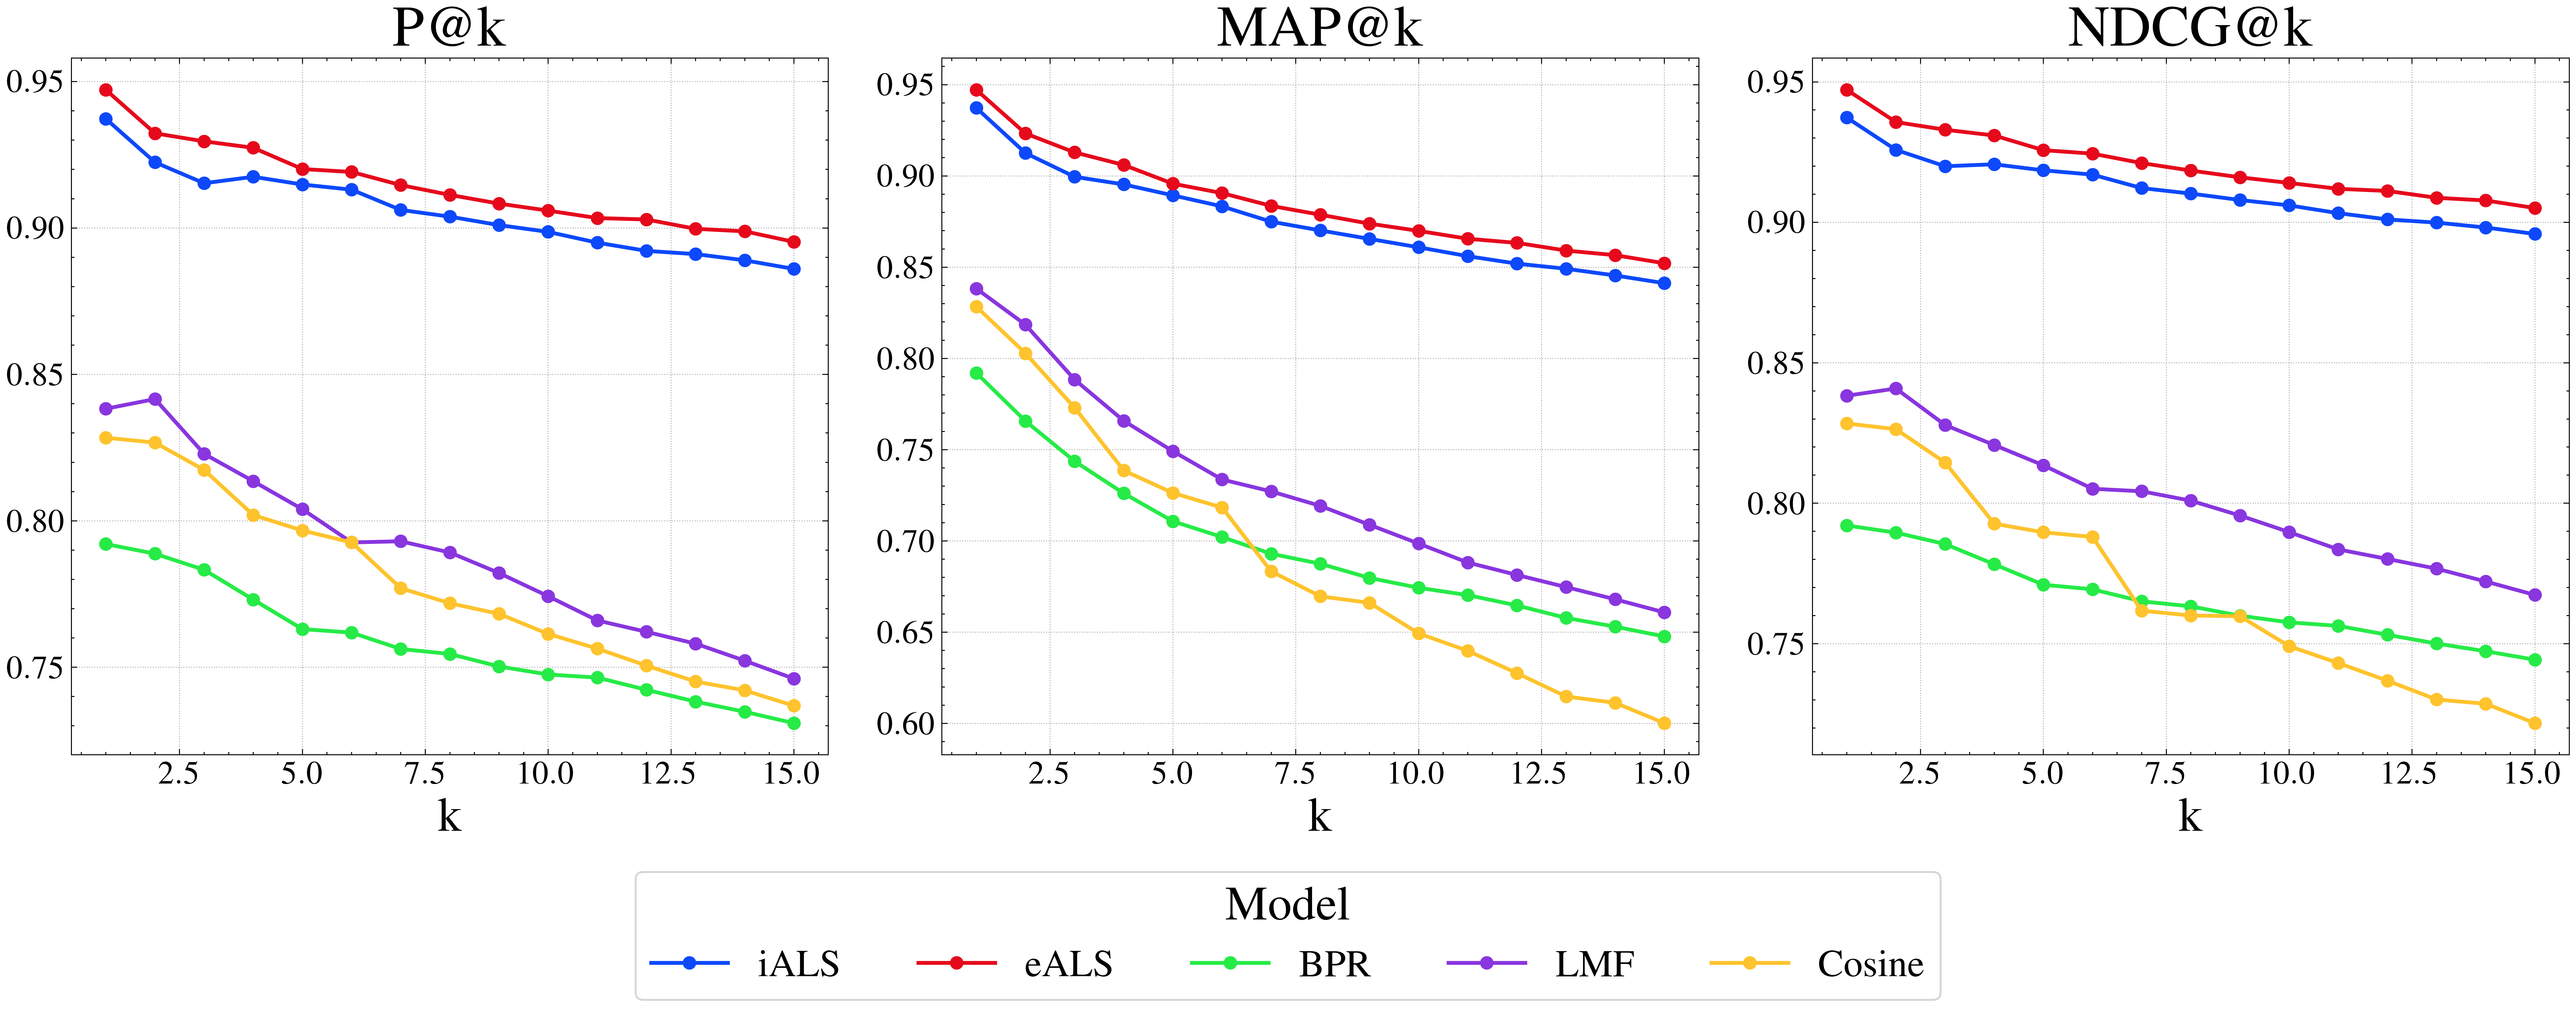

In [75]:
# For OEM1:
plt.style.use(['science', 'ieee', 'high-vis'])
data_df = [precision_a, map_a, ndcg_a]
names = ['P@k', 'MAP@k', 'NDCG@k']

# plotting of the four curves
fig, ax = plt.subplots(figsize=(26, 8), nrows=1, ncols=3)
plt.subplots_adjust(wspace=0.15, hspace=0.3, right=0.82, bottom=0.25)
c = 0
for i in range(3):
    data_filtered = data_df[c]
    ax[i].plot(data_filtered, linestyle='-', marker='o', linewidth=2)
    ax[i].set_title(names[c], fontsize=30)
    ax[i].set_xlabel('k', fontsize=25)
    ax[i].tick_params(axis='both', which='major', labelsize=17)
    ax[i].tick_params(axis='both', which='minor', labelsize=17)
    ax[i].autoscale()
    ax[i].grid(linestyle=':')
    c += 1
fig.legend(data_filtered.columns, loc='lower center', ncol=6, title='Model',fancybox=True, shadow=False, frameon=True, title_fontsize=25, fontsize=20)
#plt.savefig('comparison_a.pdf')
plt.show()

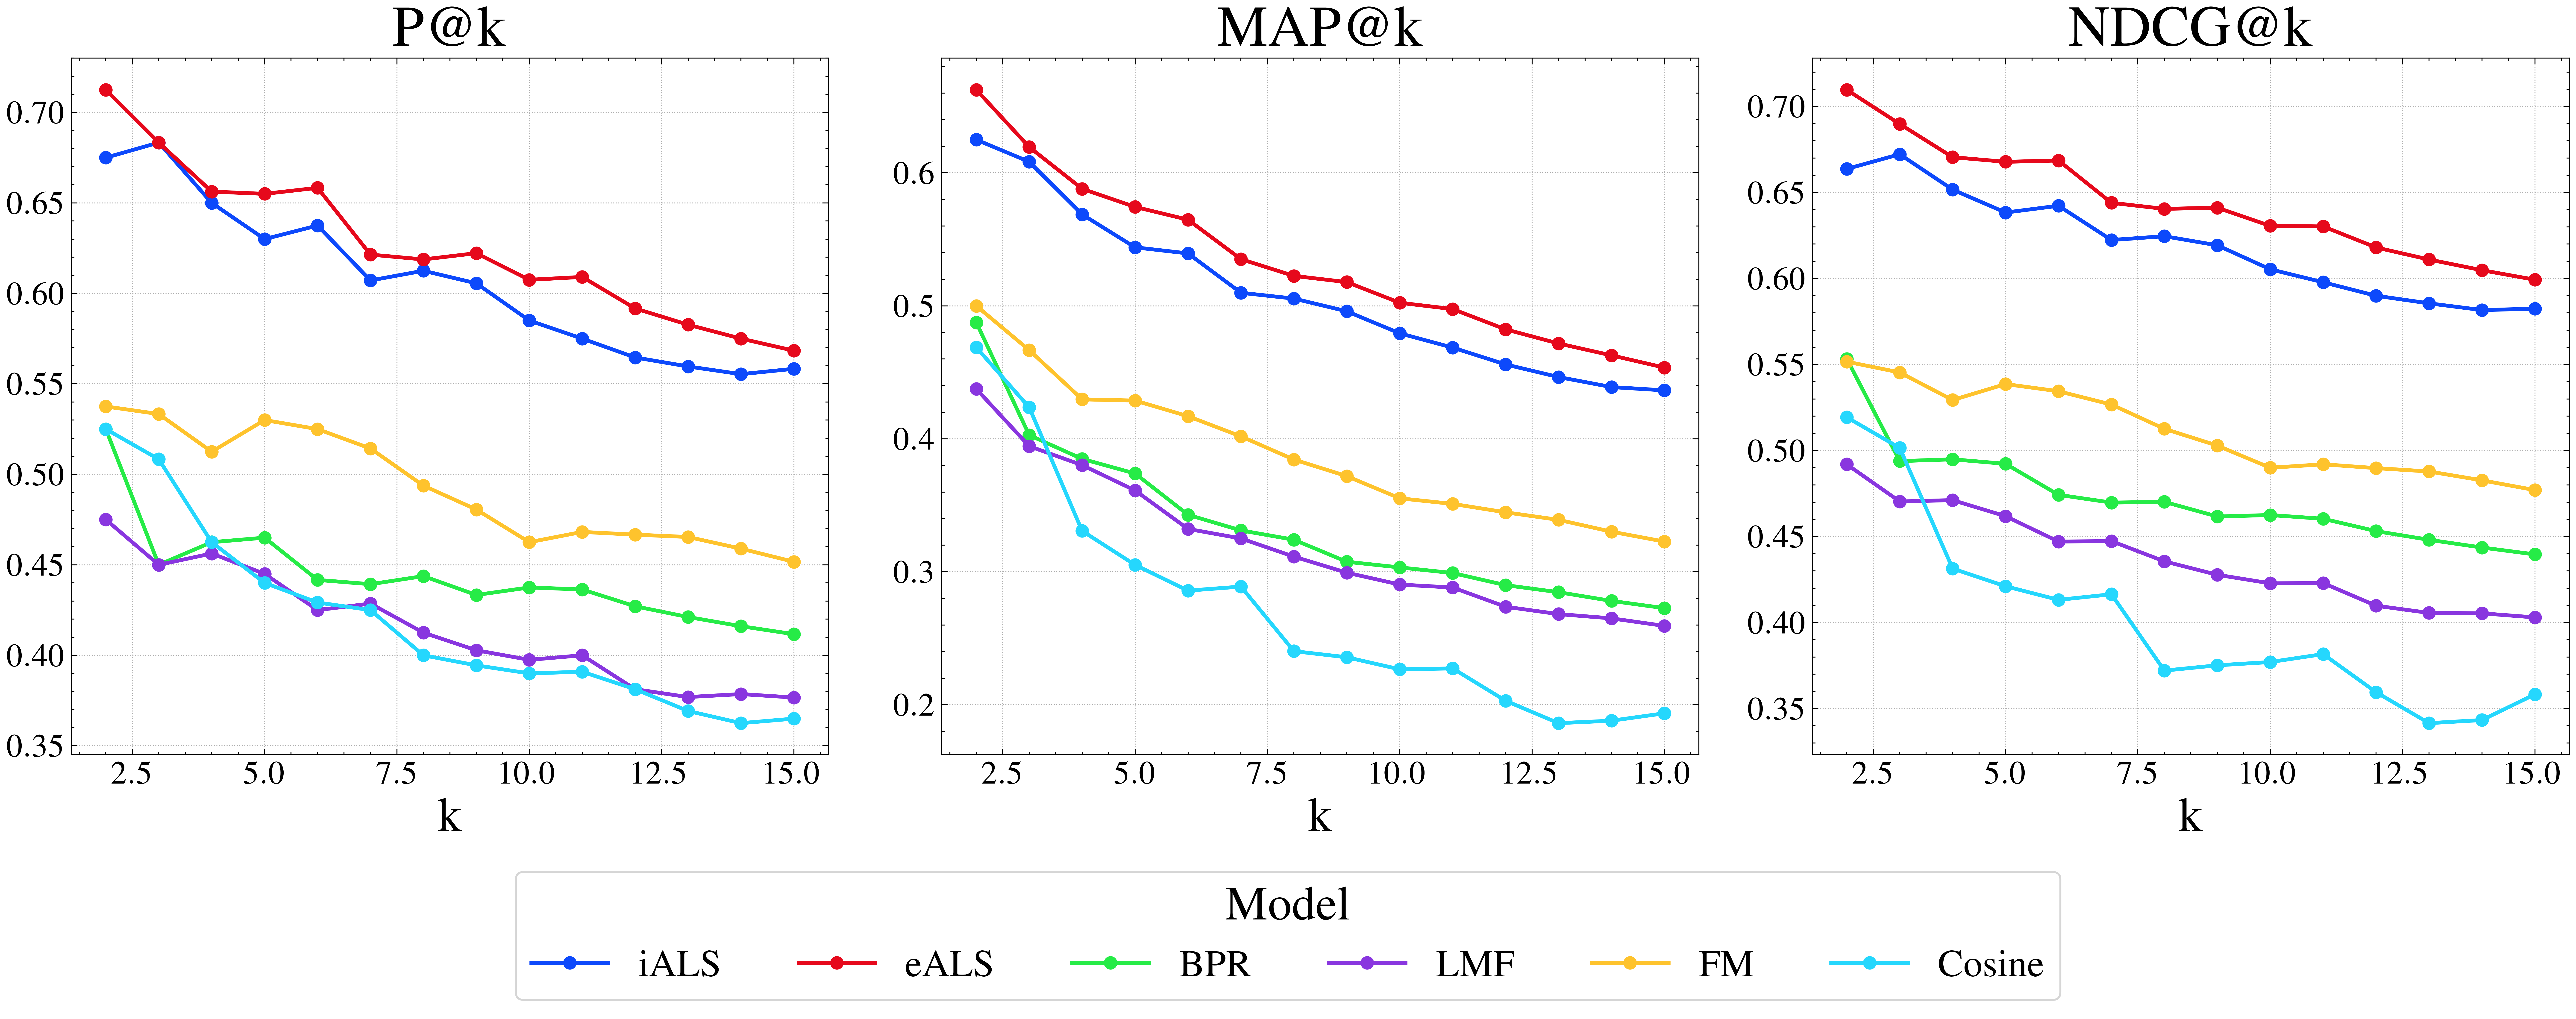

In [88]:
# For OEM2:
plt.style.use(['science', 'ieee', 'high-vis'])
data_df = [precision_t.iloc[1:, :], map_t.iloc[1:, :], ndcg_t.iloc[1:, :]]
names = ['P@k', 'MAP@k', 'NDCG@k']

# plotting of the four curves
fig, ax = plt.subplots(figsize=(26, 8), nrows=1, ncols=3)
plt.subplots_adjust(wspace=0.15, hspace=0.3, right=0.82, bottom=0.25)
c = 0
for i in range(3):
    data_filtered = data_df[c]
    ax[i].plot(data_filtered, linestyle='-', marker='o', linewidth=2)
    ax[i].set_title(names[c], fontsize=30)
    ax[i].set_xlabel('k', fontsize=25)
    ax[i].tick_params(axis='both', which='major', labelsize=17)
    ax[i].tick_params(axis='both', which='minor', labelsize=17)
    ax[i].autoscale()
    ax[i].grid(linestyle=':')
    c += 1
fig.legend(data_filtered.columns, loc='lower center', ncol=6, title='Model',fancybox=True, shadow=False, frameon=True, title_fontsize=25, fontsize=20)
#plt.savefig('comparison_t.pdf')
plt.show()

Summarize the results in a table for both OEMs, all metrics and models and different ks:

In [57]:
# For OEM1:
ks =[5, 10, 15]
models = [hyper_ials, hyper_eals, hyper_bpr, hyper_lmf, ret_df]
fi = True
for mod in models:
    if fi:
        res = mod[mod.index.isin(ks)]
        fi = False
    else:
        res = pd.concat([res, mod[mod.index.isin(ks)]], axis=0)
round(res, 3).T

,5,10,15,5,10,15,5,10,15,5,10,15,5,10,15
precision,0.915,0.899,0.886,0.920,0.906,0.895,0.763,0.748,0.731,0.804,0.774,0.746,0.797,0.761,0.737
map,0.889,0.861,0.841,0.896,0.870,0.852,0.711,0.674,0.648,0.749,0.699,0.661,0.726,0.649,0.600
ndcg,0.919,0.906,0.896,0.926,0.914,0.905,0.771,0.758,0.744,0.814,0.790,0.767,0.790,0.749,0.722
auc,0.503,0.505,0.507,0.503,0.505,0.507,0.502,0.503,0.505,0.502,0.504,0.505,0.502,0.504,0.505
mpr,0.082,0.082,0.082,0.078,0.078,0.078,0.167,0.167,0.167,0.185,0.185,0.185,NaN,NaN,NaN


In [87]:
# For OEM2:
ks =[5, 10, 15]
models = [hyper_ials_t, hyper_eals_t, hyper_bpr_t, hyper_lmf_t, hyper_fm_t, ret_df_t]
fi = True
for mod in models:
    if fi:
        res = mod[mod.index.isin(ks)]
        fi = False
    else:
        res = pd.concat([res, mod[mod.index.isin(ks)]], axis=0)
round(res, 3).T

,5,10,15,5,10,15,5,10,15,5,10,15,5,10,15,5,10,15
precision,0.630,0.585,0.558,0.655,0.608,0.568,0.465,0.438,0.412,0.445,0.398,0.377,0.530,0.462,0.452,0.440,0.390,0.365
map,0.544,0.479,0.436,0.574,0.502,0.454,0.374,0.303,0.273,0.361,0.290,0.259,0.429,0.355,0.323,0.305,0.227,0.194
ndcg,0.638,0.605,0.582,0.668,0.631,0.599,0.492,0.463,0.440,0.462,0.423,0.403,0.539,0.490,0.477,0.421,0.377,0.358
auc,0.508,0.513,0.519,0.508,0.514,0.520,0.506,0.510,0.514,0.505,0.508,0.511,0.507,0.510,0.515,0.506,0.510,0.514
mpr,0.106,0.106,0.106,0.102,0.102,0.102,0.123,0.123,0.123,0.208,0.208,0.208,0.120,0.120,0.120,NaN,NaN,NaN
